In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
import multiprocessing
plt.close("all")

In [ ]:
data = pd.read_excel('ace-the-case.xlsx')
df = pd.DataFrame(data)

In [ ]:
df

,Employee_ID,Department,Work Ratings,Company Origin,Tenure with the Company,Pay
0,ID000001,R&D,A,Mediatech,16,65000
1,ID000002,R&D,A,Mediatech,15,74000
2,ID000003,R&D,A,Mediatech,12,77000
3,ID000004,R&D,A,Mediatech,2,77000
4,ID000005,R&D,A,Mediatech,9,61000
...,...,...,...,...,...,...
995,ID000996,Quality Assurance,C,TechLaunchers,13,30000
996,ID000997,Quality Assurance,C,TechLaunchers,3,11000
997,ID000998,Quality Assurance,C,TechLaunchers,25,11000
998,ID000999,Quality Assurance,C,TechLaunchers,12,27000


<Axes: xlabel='Department'>

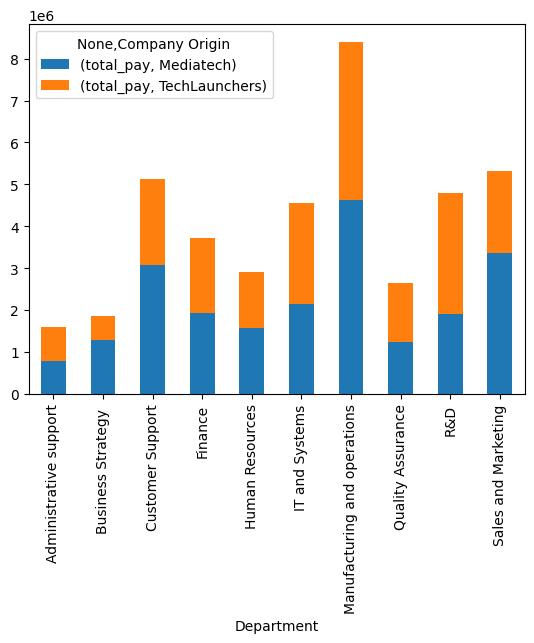

In [ ]:
df.groupby(['Department', 'Company Origin']).agg(
    total_pay=('Pay', 'sum'),
).unstack().plot.bar(stacked=True)

<Axes: xlabel='Department'>

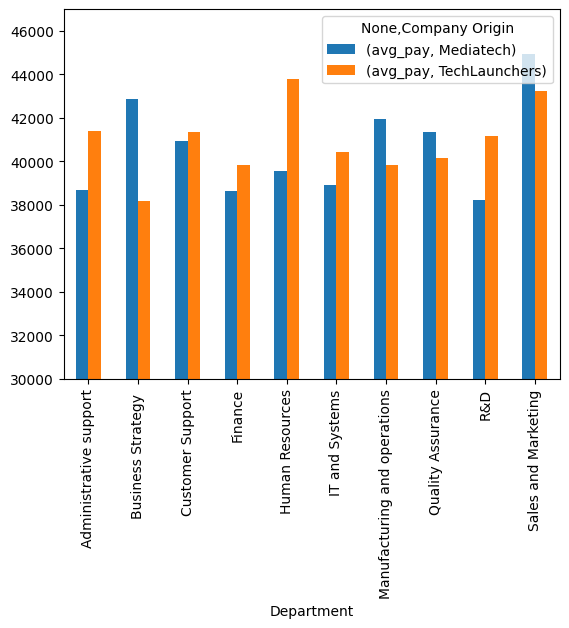

In [ ]:
df.groupby(['Department', 'Company Origin']).agg(
    avg_pay=('Pay', 'mean'),
).unstack().plot.bar(ylim=(30000, 47000))

In [ ]:
df.groupby(['Department', 'Company Origin', 'Work Ratings']).agg(
    avg_pay=('Pay', 'sum'),
    number=('Employee_ID', 'count')
).round().to_excel("departmen-company-work-rating-pay.xlsx")

In [ ]:
t2 = df[['Employee_ID', 'Work Ratings', 'Pay', 'Tenure with the Company']]
t2['Pay/Tenure'] = t2['Pay']/t2['Tenure with the Company']
t2.round().sort_values(by='Pay/Tenure', ascending=False).to_excel('pay-tenure.xlsx')
t2

<ipython-input-18-54bafbf20daf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t2['Pay/Tenure'] = t2['Pay']/t2['Tenure with the Company']


,Employee_ID,Work Ratings,Pay,Tenure with the Company,Pay/Tenure
0,ID000001,A,65000,16,4062.500000
1,ID000002,A,74000,15,4933.333333
2,ID000003,A,77000,12,6416.666667
3,ID000004,A,77000,2,38500.000000
4,ID000005,A,61000,9,6777.777778
...,...,...,...,...,...
995,ID000996,C,30000,13,2307.692308
996,ID000997,C,11000,3,3666.666667
997,ID000998,C,11000,25,440.000000
998,ID000999,C,27000,12,2250.000000


In [ ]:
t2 = df[['Employee_ID', 'Work Ratings', 'Pay', 'Tenure with the Company']]
t2['Work Ratings'] = t2['Work Ratings'].map({'A': 3, 'B': 2, 'C': 1})
t2['Pay/Work'] = t2['Pay']/t2['Work Ratings']
t2.sort_values(by='Pay/Work', ascending=False).to_excel('pay-work.xlsx')
t2

<ipython-input-11-cebed4bede4e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t2['Work Ratings'] = t2['Work Ratings'].map({'A': 3, 'B': 2, 'C': 1})
<ipython-input-11-cebed4bede4e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t2['Pay/Work'] = t2['Pay']/t2['Work Ratings']


,Employee_ID,Work Ratings,Pay,Tenure with the Company,Pay/Work
0,ID000001,3,65000,16,21666.666667
1,ID000002,3,74000,15,24666.666667
2,ID000003,3,77000,12,25666.666667
3,ID000004,3,77000,2,25666.666667
4,ID000005,3,61000,9,20333.333333
...,...,...,...,...,...
995,ID000996,1,30000,13,30000.000000
996,ID000997,1,11000,3,11000.000000
997,ID000998,1,11000,25,11000.000000
998,ID000999,1,27000,12,27000.000000


In [ ]:
df.loc[df['Employee_ID'] == 'ID000001']

,Employee_ID,Department,Work Ratings,Company Origin,Tenure with the Company,Pay
0,ID000001,R&D,A,Mediatech,16,65000


In [ ]:
import openpyxl, math
wb = openpyxl.load_workbook('finale (3).xlsx')

In [ ]:
t3 = t2.sort_values(by='Pay/Work', ascending=False)
rem = t3.head(300)['Employee_ID'].to_list()
keep = t3.tail(535)['Employee_ID'].to_list()

total_work = 0
total_pay = 0
mapping = {'A':3, 'B':2, 'C':1}
for id in keep:
  if(id == 'EmployeeID'):
    continue

  emp = df.loc[df['Employee_ID'] == id]
  dept = emp['Department'].item()
  rating = emp['Work Ratings'].item()
  company = emp['Company Origin'].item()
  tenure = emp['Tenure with the Company'].item()
  pay = emp['Pay'].item()

  total_work += mapping[rating]
  total_pay += int(pay)

print((total_work/total_pay)/4.6870799833826154e-05)

1.1759776593113764


In [ ]:
def preprocess_vals(sheet, rows):
    fs = None
    fs = wb[sheet]
    removed = []
    none = []
    allp = []
    row = 0
    for row in range(1,rows+1):
      cell_color = fs.cell(column=1, row=row)
      bgColor = cell_color.fill.bgColor.index
      fgColor = cell_color.fill.fgColor.index

      allp.append(row)
      if (bgColor=='00000000') or (fgColor=='00000000') or (bgColor=='FFFFFFFF') or (fgColor=='FFFFFFFF'):
          none.append(row)
      else:
          removed.append(row)

    return (fs, allp, none, removed)

def read_data(department, vals):
  mapping = {'A':3, 'B':2, 'C':1}
  total_work = 0
  total_pay = 0
  nmediatech = 0
  ntechlaunchers = 0
  n15years = 0
  n5years = 0
  aemps = 0
  bemps = 0

  for row in vals[2]:
    s = str(row)
    id = vals[0]['A'+s].value
    if(id == 'EmployeeID'):
      continue

    emp = df.loc[df['Employee_ID'] == id]
    dept = emp['Department'].item()
    rating = emp['Work Ratings'].item()
    company = emp['Company Origin'].item()
    tenure = emp['Tenure with the Company'].item()
    pay = emp['Pay'].item()

    if(company == 'Mediatech'):
      nmediatech += 1
    if(company == 'TechLaunchers'):
      ntechlaunchers += 1

    if(tenure>=15):
      n15years += 1
    if(tenure>=5):
      n5years += 1

    if(rating == "A"):
      aemps += 1
    if(rating == "B"):
      bemps += 1

    total_work += mapping[rating]
    total_pay += int(pay)

  original_aemps = 0
  original_bemps = 0
  original_total_pay = 0
  original_total_work = 0
  noriginal_mediatech = 0
  noriginal_techlaunchers = 0
  original_n15years = 0
  original_n5years = 0
  row = 0
  for row in vals[1]:
    s = str(row)
    id = vals[0]['A'+s].value
    if(id == 'EmployeeID'):
      continue

    emp = df.loc[df['Employee_ID'] == id]
    dept = emp['Department'].item()
    rating = emp['Work Ratings'].item()
    company = emp['Company Origin'].item()
    tenure = emp['Tenure with the Company'].item()
    pay = emp['Pay'].item()

    if(company == 'Mediatech'):
      noriginal_mediatech += 1
    if(company == 'TechLaunchers'):
      noriginal_techlaunchers += 1

    if(tenure>=15):
      original_n15years += 1
    if(tenure>=5):
      original_n5years += 1

    if(rating == "A"):
      original_aemps += 1
    if (rating == "B"):
      original_bemps += 1

    original_total_work += mapping[rating]
    original_total_pay += int(pay)

  return {
      'department': department,
      'employees': len(vals[2]),
      'a_employees': aemps,
      'b_employees': bemps,
      'c_employees': len(vals[2]) - aemps - bemps,
      'mediatech_employees': nmediatech,
      'techlaunchers_employees': ntechlaunchers,
      'original_employees': len(vals[1]),
      'original_a_employees': original_aemps,
      'original_b_employees': original_bemps,
      'original_c_employees': len(vals[1]) - original_aemps - original_bemps,
      'original_mediatech_employees': noriginal_mediatech,
      'original_techlaunchers_employees': noriginal_techlaunchers,
      '15years': n15years,
      '5years': n5years,
      'original_15years': original_n15years,
      'original_5years': original_n15years,
      'total_work': total_work,
      'total_pay': total_pay,
      'original_total_work': original_total_work,
      'original_total_pay': original_total_pay,
    }

def get_stats(data):
  percent_employees = round(data['employees']*100/data['original_employees'])
  mediatech_criteria = math.ceil(data['original_mediatech_employees'] * 20/100) < data['mediatech_employees']
  techlaunchers_criteria = math.ceil(data['original_techlaunchers_employees'] * 20/100) < data['techlaunchers_employees']

  cost_reduction = data['original_total_pay'] - data['total_pay']
  cost_reduction_percent = math.ceil(cost_reduction*100/data['original_total_pay'])
  cost_reduction_critiera = cost_reduction_percent > 10
  original_output_cost_ratio = (data['original_total_work'] / data['original_total_pay'])
  current_output_cost_ratio = (data['total_work'] / data['total_pay'])
  ratio_increase = math.ceil((current_output_cost_ratio-original_output_cost_ratio)*100/original_output_cost_ratio)

  n15retained_criteria = math.ceil(data['original_15years']*5/100) < data['15years']
  n5retained_criteria = math.ceil(data['original_5years']*15/100) < data['5years']

  a_percent = math.ceil(data['a_employees']*100/data['original_a_employees'])
  b_percent = math.ceil(data['b_employees']*100/data['original_b_employees'])
  a_criteria = a_percent >= 60
  b_criteria = b_percent >= 30
  print('-----')
  print("Department: " + str(data['department']).upper())
  print("No. of employees: " + str(data['original_employees']))
  print("No. of current employees: " + str(data['employees']))
  print("Retained employees: " + str(percent_employees) + "%")
  print()
  print("No. of original mediatech employees: " + str(data['original_mediatech_employees']))
  print("No. of original techlaunchers employees: " + str(data['original_techlaunchers_employees']))
  print("No. of current mediatech employees: " + str(data['mediatech_employees']) + " | 20% Criteria met? " + ("Yes." if mediatech_criteria else "No."))
  print("No. of current techlaunchers employees: " + str(data['techlaunchers_employees']) + " | 20% Criteria met? " + ("Yes." if techlaunchers_criteria else "No."))
  print()
  print("Original 15yrs employees: " + str(data['original_15years']))
  print("Original 5yrs employees: " + str(data['original_5years']))
  print("Current 15yrs employees: " + str(data['15years']) + " | 5% Criteria met? " + ("Yes." if n15retained_criteria else "No."))
  print("Current 5yrs employees: " + str(data['5years']) + " | 15% Criteria met? " + ("Yes." if n5retained_criteria else "No."))
  print("Retained A employees: " + str(a_percent) + "% | 60% Criteria met? " + ("Yes." if a_criteria else "No."))
  print("Retained B employees: " + str(b_percent) + "% | 30% Criteria met? " + ("Yes." if b_criteria else "No."))
  print()
  print("Original Costs: " + str(data['original_total_pay']))
  print("Original Work Output: " + str(data['original_total_work']))
  print("Current Costs: " + str(data['total_pay']))
  print("Work Output: " + str(data['total_work']))
  print("Cost Reduction: " + str(cost_reduction_percent) + "% | 10% Criteria met? " + ("Yes." if cost_reduction_critiera else "No."))
  print("Original Output/Cost Ratio: " + "{:e}".format(original_output_cost_ratio))
  print("Current Output/Cost Ratio: " + "{:e}".format(current_output_cost_ratio))
  print("Output/Cost Ratio Change: " + str(ratio_increase) + "%")
  print("-----")

In [ ]:
sheets = [('quality', 65), ('Sales', 119), ('Manufacturing', 205), ('IT', 115), ('customer', 125), ('HR', 70), ('finance', 95), ('admin', 40), ('Business', 45), ('r and d', 120)]
emp = 0
total_work = 0
total_pay = 0
a_emp = 0
b_emp = 0
original_total_work = 0
original_total_pay = 0
original_a_emp = 0
original_b_emp = 0
ppl = []
mt = 0
tl = 0
omt = 0
otl = 0
for s in sheets:
  p = preprocess_vals(s[0], s[1])
  data = read_data(s[0].capitalize(), p)
  get_stats(data)
  total_work += data['total_work']
  total_pay += data['total_pay']
  original_total_work += data['original_total_work']
  original_total_pay += data['original_total_pay']
  a_emp += data['a_employees']
  b_emp += data['b_employees']
  original_a_emp += data['original_a_employees']
  original_b_emp += data['original_b_employees']
  emp += data['employees']
  mt += data['mediatech_employees']
  tl += data['techlaunchers_employees']
  omt += data['original_mediatech_employees']
  otl += data['original_techlaunchers_employees']

  for row in p[2]:
    s = str(row)
    id = p[0]['A'+s].value
    if(id == 'EmployeeID'):
      continue

    x = df.loc[df['Employee_ID'] == id]
    ppl.append(x)

cost_reduction = original_total_pay - total_pay
cost_reduction_percent = math.ceil(cost_reduction*100/original_total_pay)
print("CURRENT EMPLOYEES: " + str(emp))
print("CURRENT MEDIATECH: " + str(mt))
print("CURRENT TECHLAUNCHERS: " + str(tl))
print("ORIGINAL MEDIATECH: " + str(omt))
print("ORIGINAL TECHLAUNCHERS: " + str(otl))
print("ORIGINAL OUTPUT: " + str(original_total_work))
print("CURRENT OUTPUT: " + str(total_work))
print("ORIGINAL COST: " + str(original_total_pay))
print("CURRENT COST: " + str(total_pay))
print("OVERALL COST REDUCTION: " + str(cost_reduction_percent) + "%")

a_percent = math.ceil(a_emp*100/original_a_emp)
b_percent = math.ceil(b_emp*100/original_b_emp)
print("OVERALL A EMPLOYEES: " + str(a_percent) + "%")
print("OVERALL B EMPLOYEES: " + str(b_percent) + "%")

original_output_cost_ratio = (original_total_work / original_total_pay)
current_output_cost_ratio = (total_work / total_pay)
ratio_increase = math.ceil((current_output_cost_ratio-original_output_cost_ratio)*100/original_output_cost_ratio)
print("ORIGINAL OUTPUT/COST: " + str(original_output_cost_ratio) + "%")
print("CURRENT OUTPUT/COST: " + str(current_output_cost_ratio) + "%")
print("OVERALL RATIO INCREASE: " + str(ratio_increase) + "%")

-----
Department: QUALITY
No. of employees: 65
No. of current employees: 39
Retained employees: 60%

No. of original mediatech employees: 30
No. of original techlaunchers employees: 35
No. of current mediatech employees: 18 | 20% Criteria met? Yes.
No. of current techlaunchers employees: 21 | 20% Criteria met? Yes.

Original 15yrs employees: 31
Original 5yrs employees: 31
Current 15yrs employees: 20 | 5% Criteria met? Yes.
Current 5yrs employees: 34 | 15% Criteria met? Yes.
Retained A employees: 60% | 60% Criteria met? Yes.
Retained B employees: 64% | 30% Criteria met? Yes.

Original Costs: 2645000
Original Work Output: 123
Current Costs: 1435000
Work Output: 75
Cost Reduction: 46% | 10% Criteria met? Yes.
Original Output/Cost Ratio: 4.650284e-05
Current Output/Cost Ratio: 5.226481e-05
Output/Cost Ratio Change: 13%
-----
-----
Department: SALES
No. of employees: 119
No. of current employees: 79
Retained employees: 66%

No. of original mediatech employees: 75
No. of original techlaunche

In [ ]:
save = openpyxl.Workbook()
sheet = save.active

for p in ppl:
  sheet.append([p.values.tolist()[0][0]])
save.save('out.xlsx')